In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import pandas as pd

In [2]:
plt.rcParams.update({'font.size': 18})

In [3]:
# Total enzyme concentration

In [4]:
E = 1e-9

In [5]:
# Define quadratic binding equation (denoted as inhibition_curve)
# and 20-point titration series of the inhibitor

In [6]:
I = np.geomspace(5e-11, 1e-6, 10)

def inhibition_curve(I, E, Ki, total_activity = 100):
    return total_activity * (E + I + Ki - np.sqrt((E + I + Ki)**2 - 4 * E * I))/(2 * E)

In [7]:
# Define 2-parametric logistic curve, something that produces IC50 values

In [8]:
def logistic_2p(x, ic50, h):
    return 100 - 100/(1 + (x/ic50)**h)

def logistic_3p(x, ic50, h, total_activity = 100):
    return total_activity - total_activity/(1 + (x/ic50)**h)

In [9]:
# Activity for individual forms of enzymes, when inhibitor
# has different Ki to different forms

/tmp/ipykernel_298/1623775820.py:2: RuntimeWarning: invalid value encountered in power
  return 100 - 100/(1 + (x/ic50)**h)


Text(0, 0.5, 'Inhibition, %')

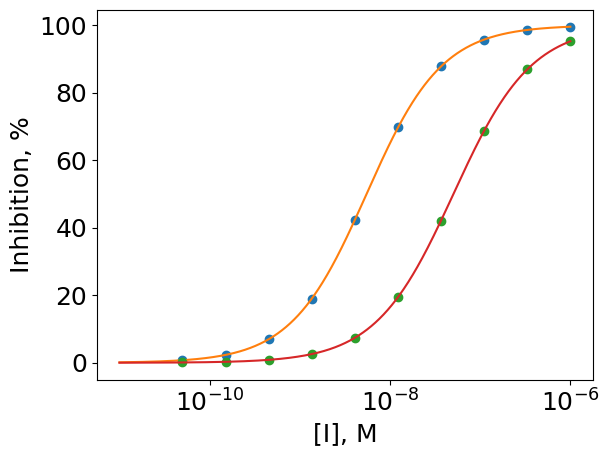

In [10]:
Ki1 = 5e-9
Ki2 = 5e-8
Ki = [Ki1, Ki2]

plt.xscale('log')
for constant in Ki:
    optimizedParameters, pcov = opt.curve_fit(logistic_2p, I, inhibition_curve(I,E,constant))
    plt.plot(I, inhibition_curve(I, E, constant), 'o')
    plt.plot(np.geomspace(1e-11, 1e-6, 1000), logistic_2p(np.geomspace(1e-11, 1e-6, 1000), *optimizedParameters), label="fit")
plt.xlabel('[I], M')
plt.ylabel('Inhibition, %')


In [11]:
# Assuming reaction mix is 1:1 of two forms of the enzyme,
# superposition of two curves and fit using sigmoidal equation
# will give h-slope below 1.

/tmp/ipykernel_298/1623775820.py:5: RuntimeWarning: invalid value encountered in power
  return total_activity - total_activity/(1 + (x/ic50)**h)


Text(0, 0.5, 'Inhibition, %')

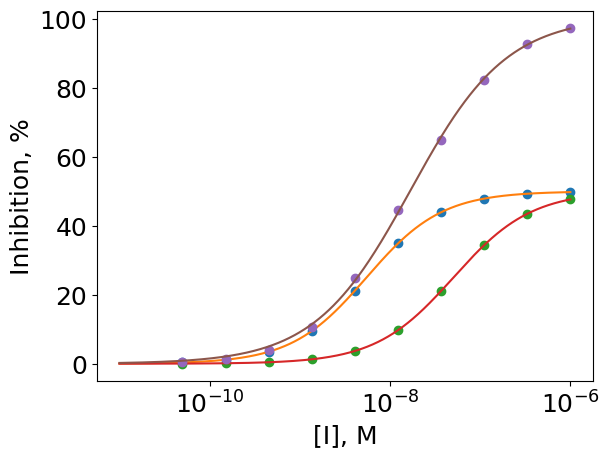

In [12]:
fit_results = pd.DataFrame()

plt.xscale('log')

# individual curves
for constant in Ki:
    optimizedParameters, pcov = opt.curve_fit(logistic_3p, I, inhibition_curve(I,E,constant, 50))
    plt.plot(I, inhibition_curve(I, E, constant, 50), 'o')
    plt.plot(np.geomspace(1e-11, 1e-6, 1000), logistic_3p(np.geomspace(1e-11, 1e-6, 1000), *optimizedParameters), label="fit")
    optimizedParameters = np.insert(optimizedParameters, 0, Ki)
    fit_results = pd.concat([fit_results, pd.DataFrame([optimizedParameters])], ignore_index=True)

# superimposed curve
optimizedParameters, pcov = opt.curve_fit(logistic_3p, I, inhibition_curve(I,E,Ki1, 50) + inhibition_curve(I,E,Ki2, 50))
plt.plot(I, inhibition_curve(I,E,Ki1, 50) + inhibition_curve(I,E,Ki2, 50),'o')
plt.plot(np.geomspace(1e-11, 1e-6, 1000), logistic_3p(np.geomspace(1e-11, 1e-6, 1000), *optimizedParameters), label="fit")
optimizedParameters = np.insert(optimizedParameters, 0, Ki)
fit_results = pd.concat([fit_results, pd.DataFrame([optimizedParameters])], ignore_index=True)

plt.xlabel('[I], M')
plt.ylabel('Inhibition, %')

In [13]:
# h-slope values for individual curves and superimposed curve.
fit_results[3]

0    1.038508
1    1.004134
2    0.813679
Name: 3, dtype: float64

In [14]:
# h-slope dependency on composition of binary system;
# 100-fold difference between Ki to different enzyme forms.
# 3-fold dilution series in 10 points, starting from 10 uM.

In [15]:
I = np.geomspace(5e-10, 1e-5, 10)
Ki1 = 5e-9
Ki2 = 5e-7

In [16]:
# plot inhibition curves for different composition of the binary system

/tmp/ipykernel_298/1623775820.py:2: RuntimeWarning: invalid value encountered in power
  return 100 - 100/(1 + (x/ic50)**h)


Text(0, 0.5, 'Inhibition, %')

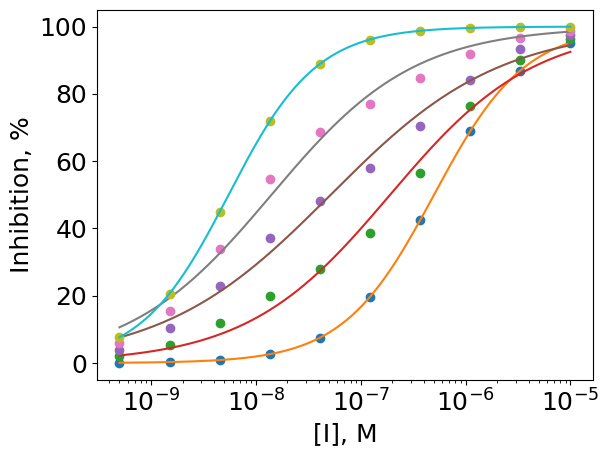

In [17]:
plt.xscale('log')

for fraction in range(0,110,25):
    superimposed_inhibition = inhibition_curve(I,E,Ki1, fraction) + inhibition_curve(I,E,Ki2, 100-fraction)
    optimizedParameters, pcov = opt.curve_fit(logistic_2p, I, superimposed_inhibition)
    plt.plot(I, superimposed_inhibition, 'o')
    plt.plot(np.geomspace(5e-10, 1e-5, 1000), logistic_2p(np.geomspace(5e-10, 1e-5, 1000), *optimizedParameters), label="fit")
    
plt.xlabel('[I], M')
plt.ylabel('Inhibition, %')

/tmp/ipykernel_298/1623775820.py:2: RuntimeWarning: invalid value encountered in power
  return 100 - 100/(1 + (x/ic50)**h)


Text(0, 0.5, 'Hill coefficient')

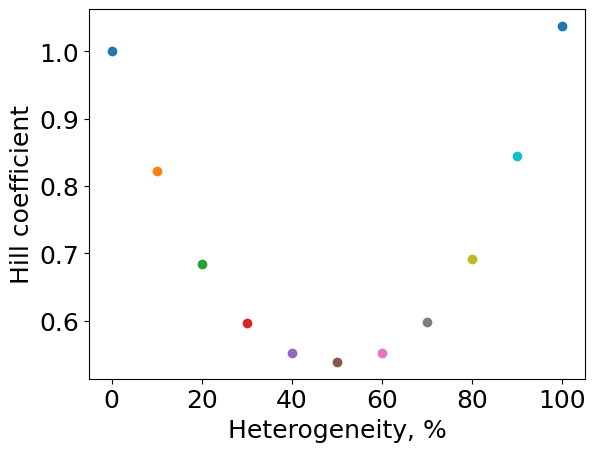

In [18]:
# h-slope dependency
for fraction in range(0,105,10):
    superimposed_inhibition = inhibition_curve(I,E,Ki1, fraction) + inhibition_curve(I,E,Ki2, 100-fraction)
    optimizedParameters, pcov = opt.curve_fit(logistic_2p, I, superimposed_inhibition)
    plt.plot(fraction, optimizedParameters[1], 'o')
    
plt.xlabel('Heterogeneity, %')
plt.ylabel('Hill coefficient')

/tmp/ipykernel_220/1623775820.py:2: RuntimeWarning: invalid value encountered in power
  return 100 - 100/(1 + (x/ic50)**h)


Text(0, 0.5, '$IC_{50}$, M')

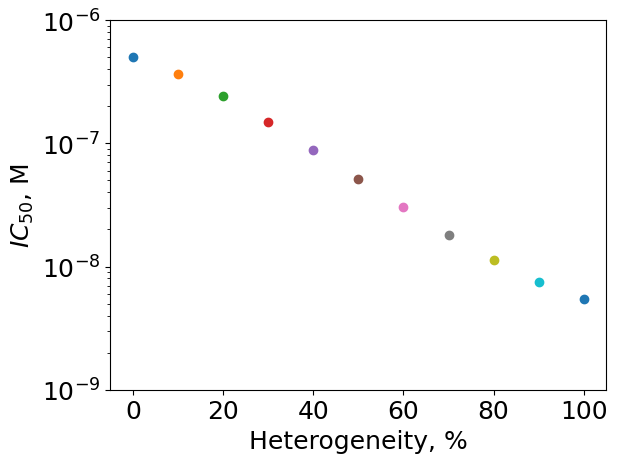

In [19]:
plt.yscale('log')
plt.ylim(1e-9, 1e-6)

# IC50 dependency
for fraction in range(0,105,10):
    superimposed_inhibition = inhibition_curve(I,E,Ki1, fraction) + inhibition_curve(I,E,Ki2, 100-fraction)
    optimizedParameters, pcov = opt.curve_fit(logistic_2p, I, superimposed_inhibition)
    plt.plot(fraction, optimizedParameters[0], 'o')
    
plt.xlabel('Heterogeneity, %')
plt.ylabel('$IC_{50}$, M')

In [20]:
# Three forms of the enzyme vs two forms

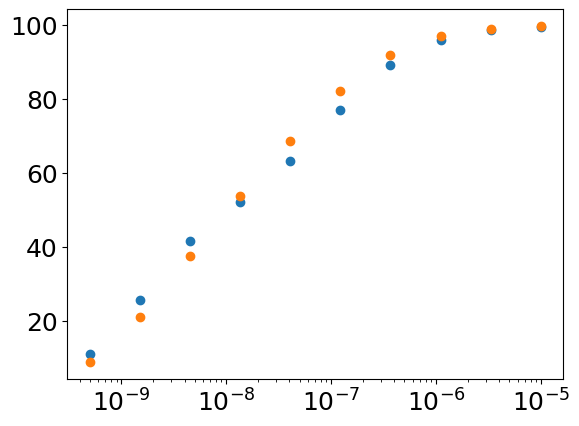

In [21]:
Ki1 = 1e-9
Ki2 = 1e-8
Ki3 = 1e-7

superimposed_2 = inhibition_curve(I,E,Ki1, 100/2) + inhibition_curve(I,E,Ki3, 100/2)
superimposed_3 = inhibition_curve(I,E,Ki1, 100/3) + inhibition_curve(I,E,Ki2, 100/3) + inhibition_curve(I,E,Ki3, 100/3)

plt.xscale('log')
plt.plot(I, superimposed_2, 'o')
plt.plot(I, superimposed_3, 'o')

In [22]:
# Role of both differences in Ki and degree of heterogeneity

In [59]:
def superimposed_inhib(I, E, Ki, deltaKi, fraction):
    return inhibition_curve(I,E,Ki, 100 - fraction) + inhibition_curve(I,E,Ki + deltaKi, fraction)

In [60]:
# Simulate and fit several inhibition curves

In [61]:
fraction = 50
Ki = 1e-9
I = np.geomspace(5e-11, 1e-6, 10)
Ki2 = np.geomspace(Ki, 1e-7, 3)
fraction = range(0,101,33)

/tmp/ipykernel_220/1623775820.py:2: RuntimeWarning: invalid value encountered in power
  return 100 - 100/(1 + (x/ic50)**h)


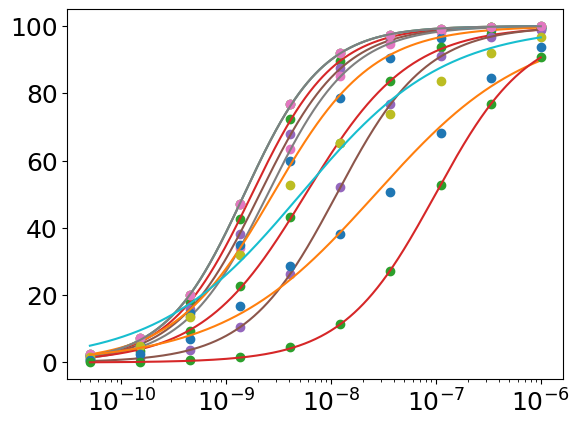

In [62]:
# fit_results2 = pd.DataFrame()

plt.xscale('log')
for Ki2_value in Ki2:
    for fraction_value in fraction:
        optimizedParameters, pcov = opt.curve_fit(logistic_2p, I, superimposed_inhib(I, E, Ki, Ki2_value, fraction_value))
        plt.plot(I, superimposed_inhib(I, E, Ki, Ki2_value, fraction_value), 'o')
        plt.plot(np.geomspace(5e-11, 1e-6, 1000), logistic_2p(np.geomspace(5e-11, 1e-6, 1000), *optimizedParameters), label="fit")
#        optimizedParameters = np.insert(optimizedParameters, 0, Ki2_value)
#        optimizedParameters = np.insert(optimizedParameters, 0, fraction_value)
#        fit_results2 = pd.concat([fit_results2, pd.DataFrame([optimizedParameters])], ignore_index=True)


In [63]:
# Simulate bigger data sets to examine Ki2 and heterogeneity values, which
# led to h < 0.8

In [64]:
Ki2 = np.geomspace(Ki, 1e-7, 100)
fraction = range(0,101,1)

fit_results2 = pd.DataFrame()

for Ki2_value in Ki2:
    for fraction_value in fraction:
        optimizedParameters, pcov = opt.curve_fit(logistic_2p, I, superimposed_inhib(I, E, Ki, Ki2_value, fraction_value))
        optimizedParameters = np.insert(optimizedParameters, 0, Ki2_value)
        optimizedParameters = np.insert(optimizedParameters, 0, fraction_value)
        fit_results2 = pd.concat([fit_results2, pd.DataFrame([optimizedParameters])], ignore_index=True)

/tmp/ipykernel_220/1623775820.py:2: RuntimeWarning: invalid value encountered in power
  return 100 - 100/(1 + (x/ic50)**h)


In [65]:
fit_results2.columns = ['Heterogeneity, %', 'Ki2, M', 'IC50, M', 'h']
fit_results2.sort_values(by=['h'])

,"Heterogeneity, %","Ki2, M","IC50, M",h
10052,53.0,1.000000e-07,1.382904e-08,0.574620
10053,54.0,1.000000e-07,1.454434e-08,0.574677
10051,52.0,1.000000e-07,1.314840e-08,0.574842
10054,55.0,1.000000e-07,1.529580e-08,0.575017
10050,51.0,1.000000e-07,1.250098e-08,0.575343
...,...,...,...,...
6565,0.0,2.056512e-08,1.483686e-09,1.152449
4646,0.0,8.497534e-09,1.483686e-09,1.152449
1818,0.0,2.310130e-09,1.483686e-09,1.152449
4949,0.0,9.770100e-09,1.483686e-09,1.152449


In [66]:
def filter_low_h(dataFrame, col_name='h', threshold=0.8):
    return dataFrame[dataFrame[col_name] < threshold]

In [67]:
filter_low_h(fit_results2)

,"Heterogeneity, %","Ki2, M","IC50, M",h
6310,48.0,1.788650e-08,4.905342e-09,0.799577
6311,49.0,1.788650e-08,5.045678e-09,0.798224
6312,50.0,1.788650e-08,5.190162e-09,0.797076
6313,51.0,1.788650e-08,5.338892e-09,0.796131
6314,52.0,1.788650e-08,5.491966e-09,0.795389
...,...,...,...,...
10083,84.0,1.000000e-07,5.924780e-08,0.740447
10084,85.0,1.000000e-07,6.164355e-08,0.753364
10085,86.0,1.000000e-07,6.408930e-08,0.766853
10086,87.0,1.000000e-07,6.658182e-08,0.780903


Text(0, 0.5, '$K_{i,2}$, M')

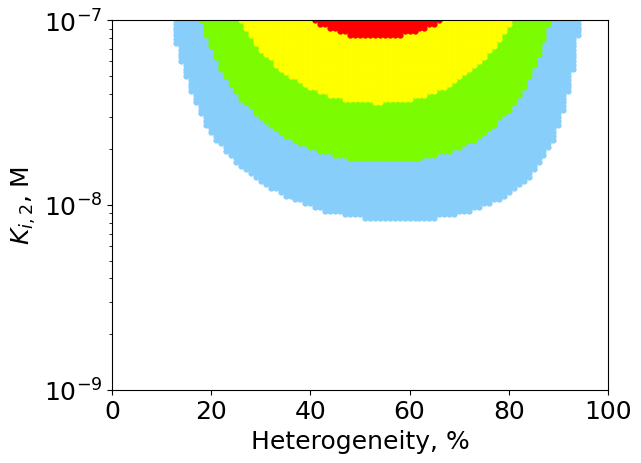

In [79]:
plt.xlim(0,100)
plt.ylim(1e-9,1e-7)
plt.yscale('log')
plt.plot(filter_low_h(fit_results2, threshold=0.9)['Heterogeneity, %'], filter_low_h(fit_results2, threshold=0.9)['Ki2, M'], '.', markersize=7, color = 'lightskyblue')
plt.plot(filter_low_h(fit_results2)['Heterogeneity, %'], filter_low_h(fit_results2)['Ki2, M'], '.', markersize=7, color = 'lawngreen')
plt.plot(filter_low_h(fit_results2, threshold=0.7)['Heterogeneity, %'], filter_low_h(fit_results2, threshold=0.7)['Ki2, M'], '.', markersize=7, color = 'yellow')
plt.plot(filter_low_h(fit_results2, threshold=0.6)['Heterogeneity, %'], filter_low_h(fit_results2, threshold=0.6)['Ki2, M'], '.', markersize=7, color = 'red')
plt.xlabel('Heterogeneity, %')
plt.ylabel('$K_{i,2}$, M')